<a href="https://colab.research.google.com/github/AW17321/EEC-179/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

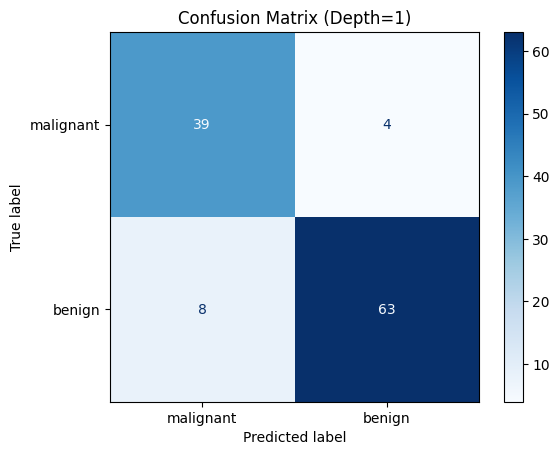

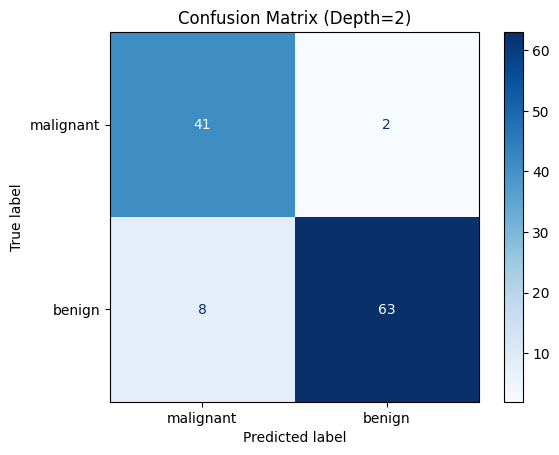

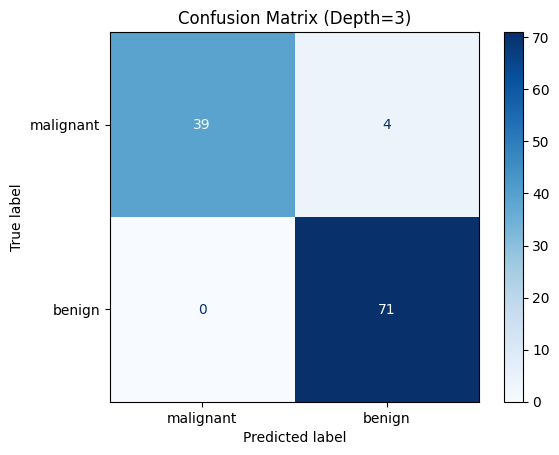

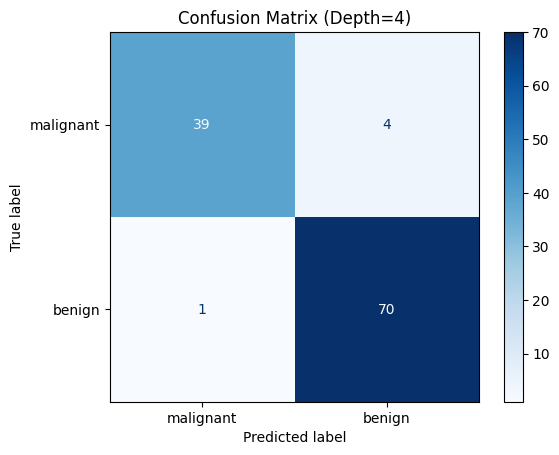

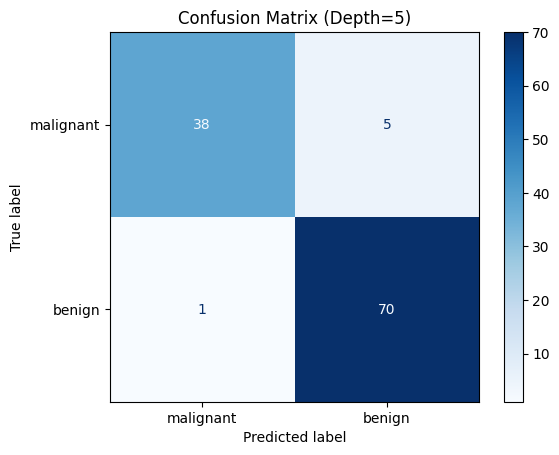

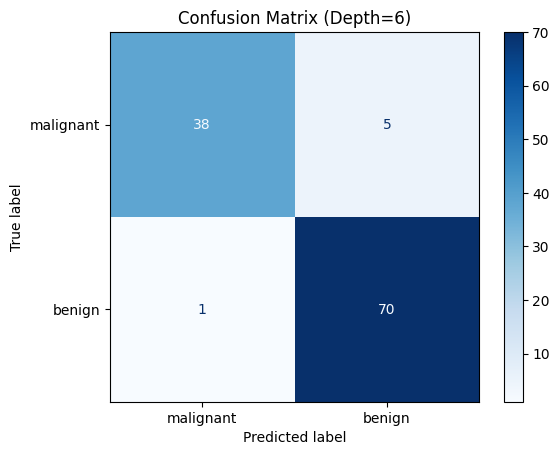

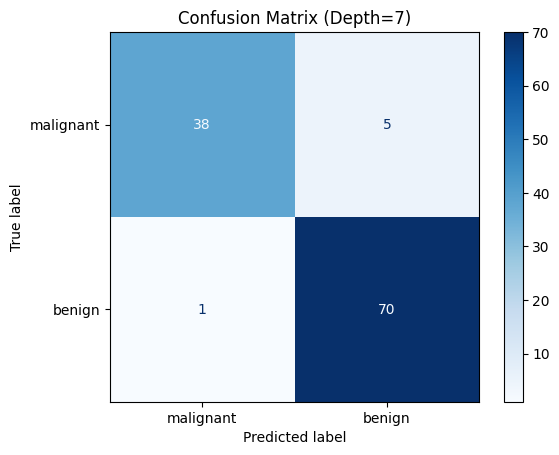

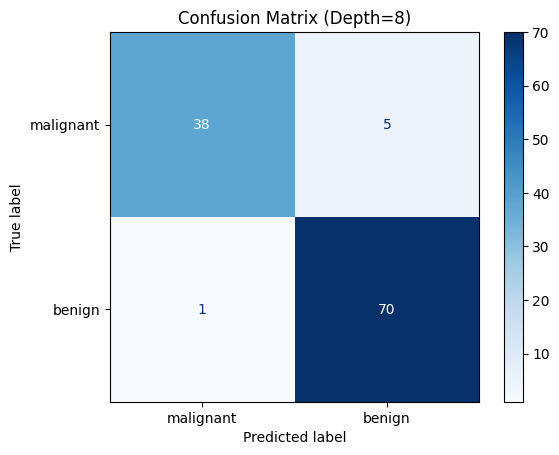

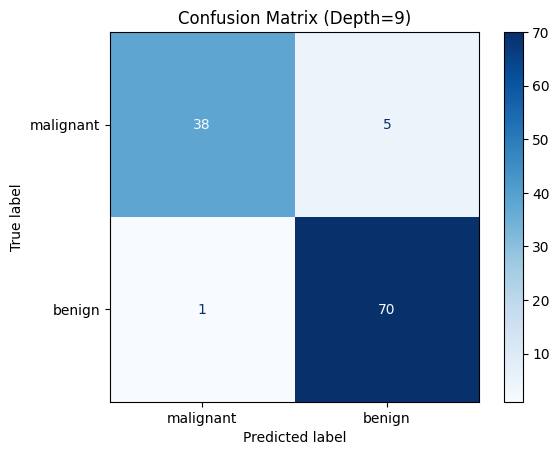

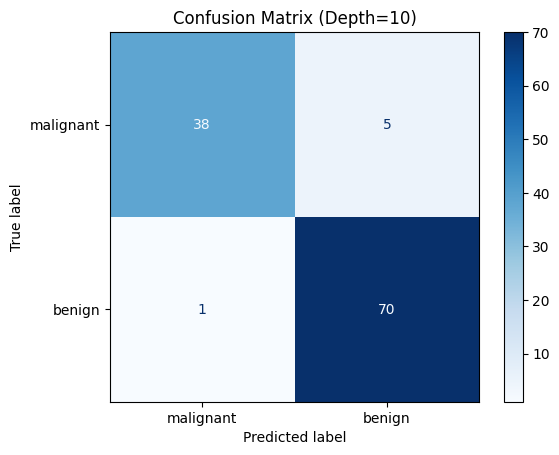

   Depth  Accuracy  Precision    Recall  F1-Score
0      1  0.894737   0.940299  0.887324  0.913043
1      2  0.912281   0.969231  0.887324  0.926471
2      3  0.964912   0.946667  1.000000  0.972603
3      4  0.956140   0.945946  0.985915  0.965517
4      5  0.947368   0.933333  0.985915  0.958904
5      6  0.947368   0.933333  0.985915  0.958904
6      7  0.947368   0.933333  0.985915  0.958904
7      8  0.947368   0.933333  0.985915  0.958904
8      9  0.947368   0.933333  0.985915  0.958904
9     10  0.947368   0.933333  0.985915  0.958904

Optimal Depth: 3


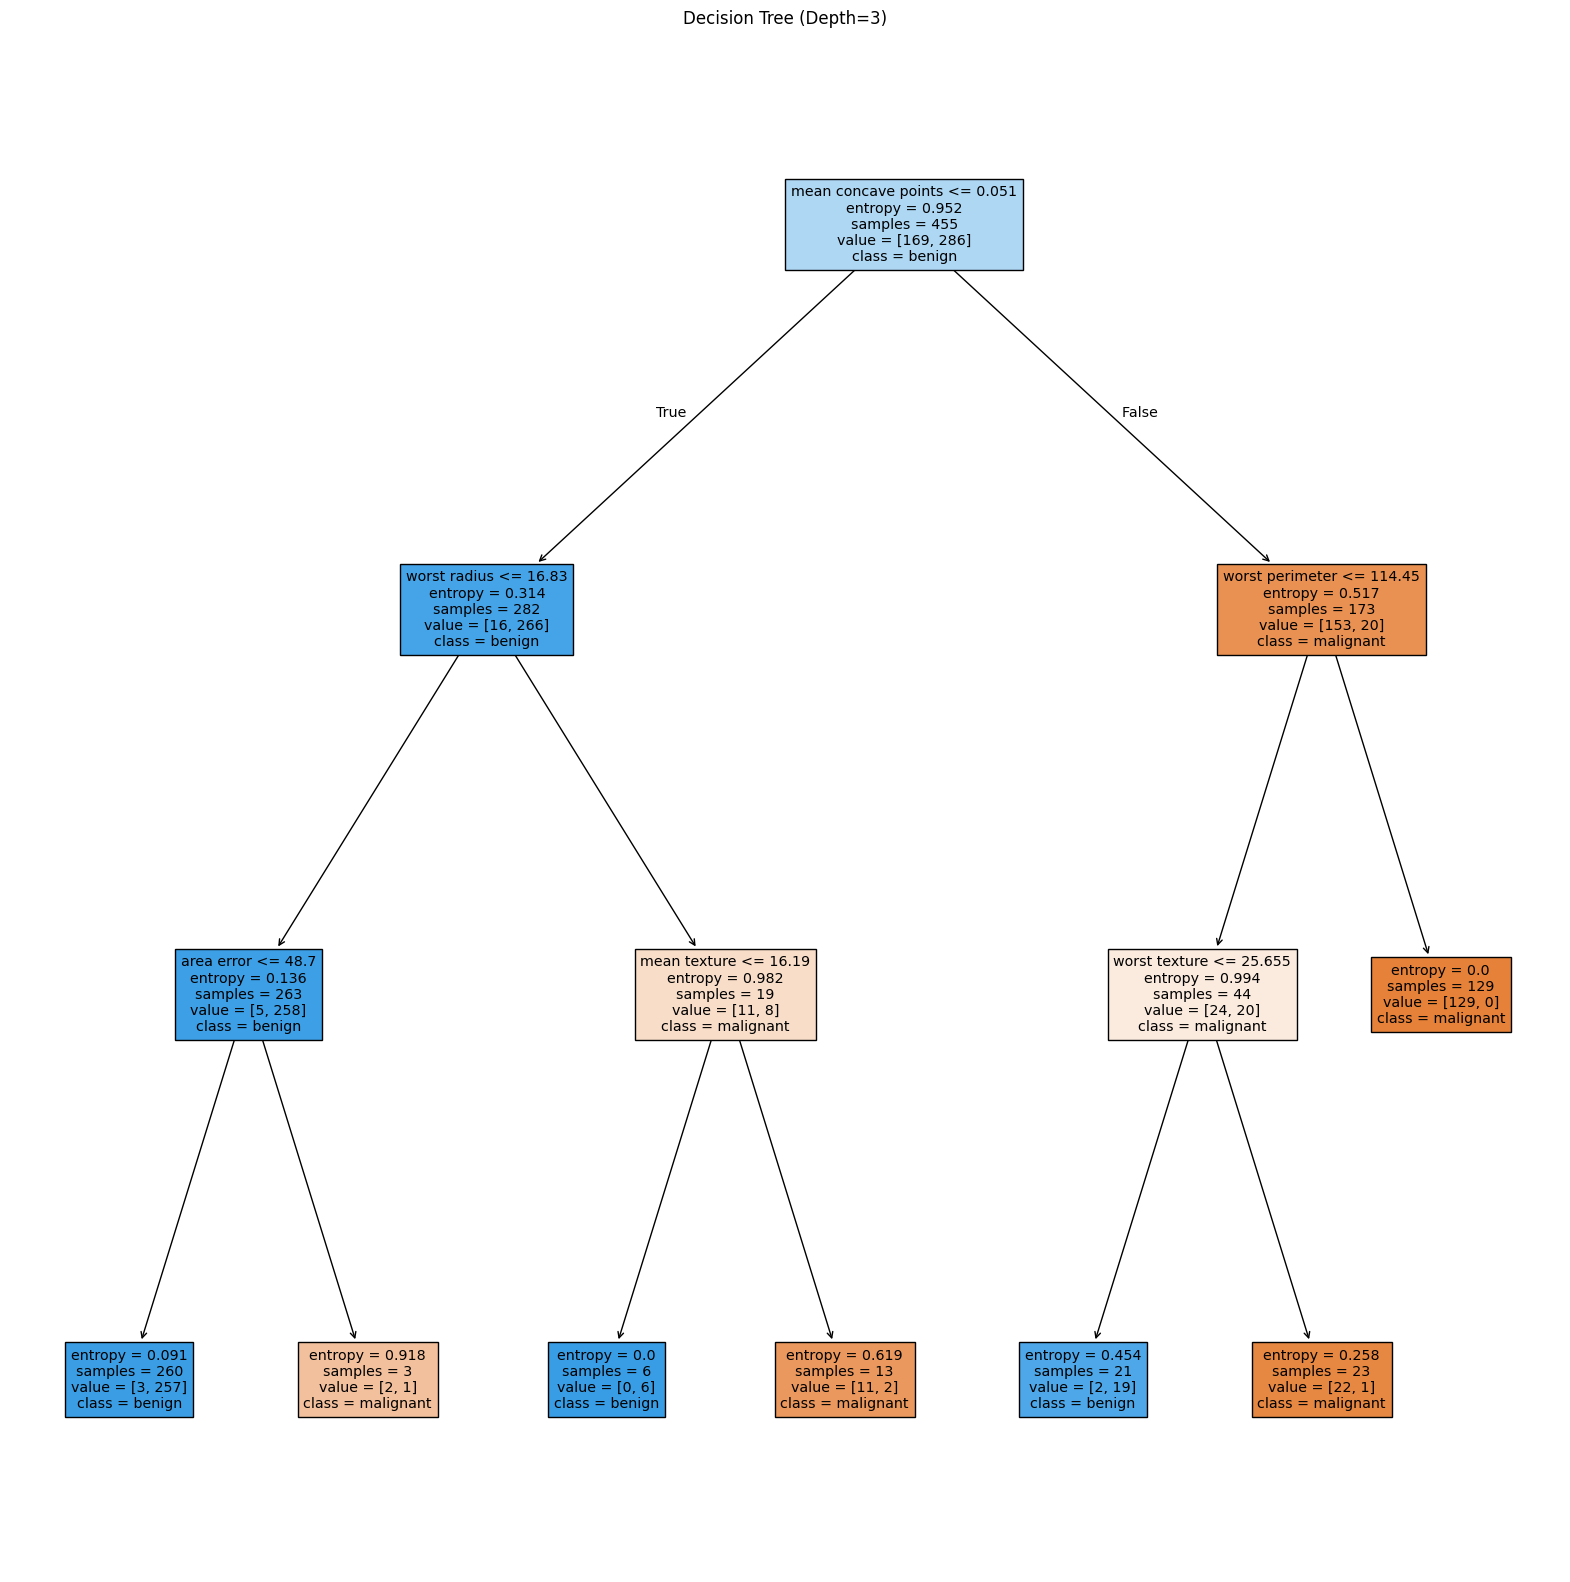

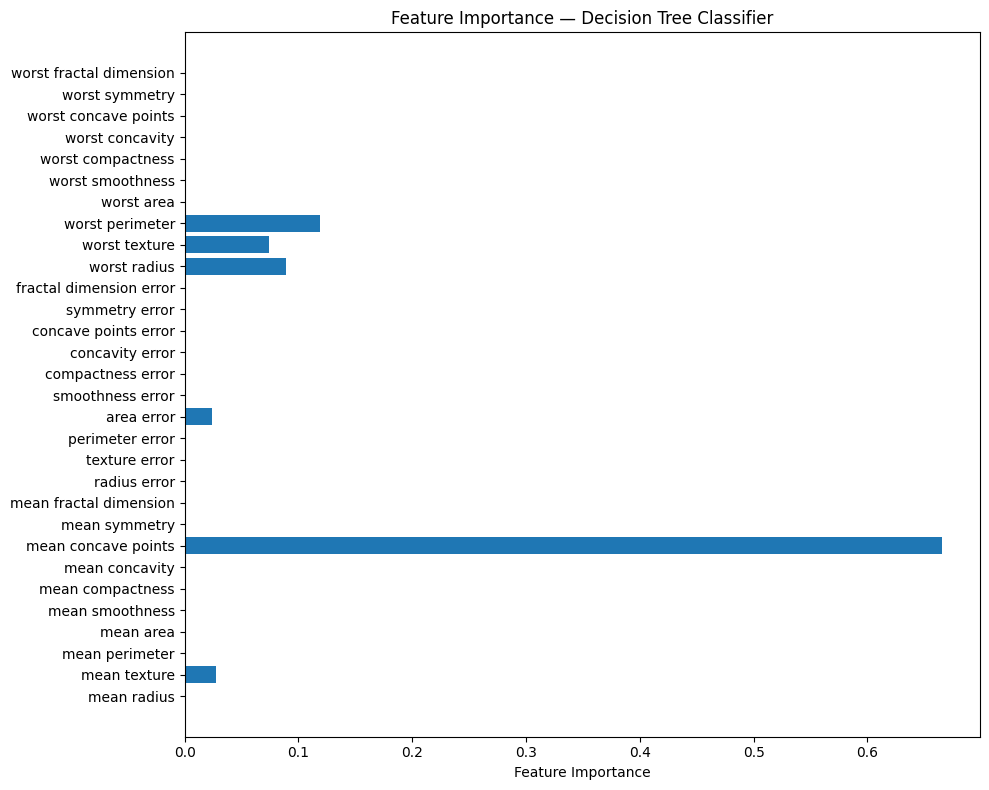

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store evaluation metrics
accuracies, precisions, recalls, f1_scores = [], [], [], []

# Evaluate Decision Tree performance with depths from 1 to 10
for depth in range(1, 11):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    # Calculate evaluation metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    # Plot confusion matrix for each depth
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix (Depth={depth})')
    plt.show()

# Summarize performance metrics
metrics_df = pd.DataFrame({
    'Depth': range(1, 11),
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})
print(metrics_df)

# Find optimal depth based on maximum accuracy
optimal_depth = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Depth']
print(f"\nOptimal Depth: {optimal_depth}")

# Train and visualize the optimal decision tree
optimal_dt = DecisionTreeClassifier(criterion="entropy", max_depth=int(optimal_depth), random_state=42)
optimal_dt.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
plot_tree(optimal_dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title(f'Decision Tree (Depth={optimal_depth})')
plt.show()

# Plot feature importance for the optimal model
importances = optimal_dt.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(data.feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance — Decision Tree Classifier")
plt.tight_layout()
plt.show()


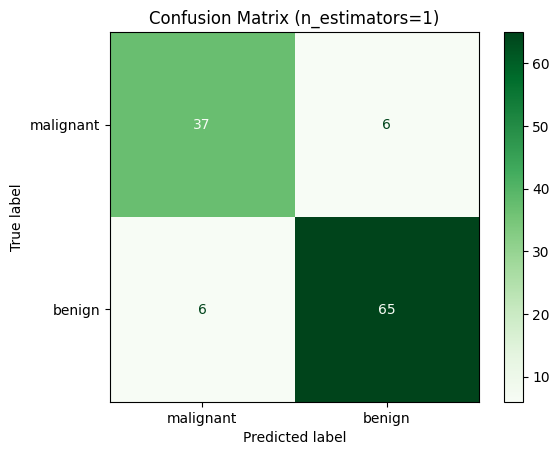

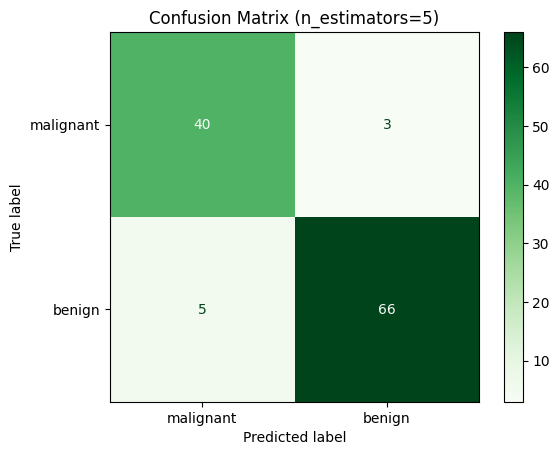

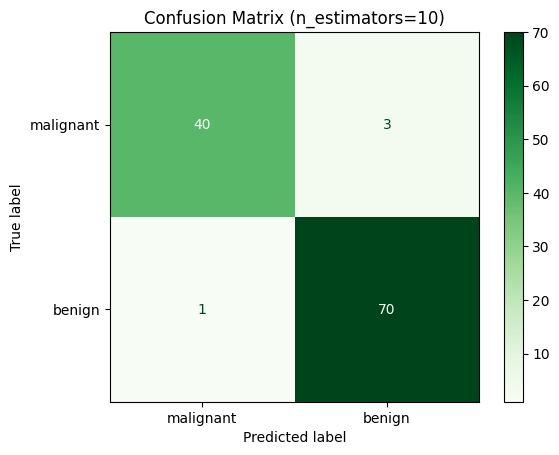

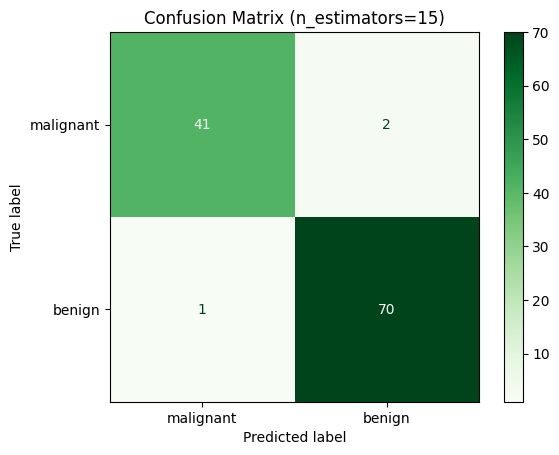

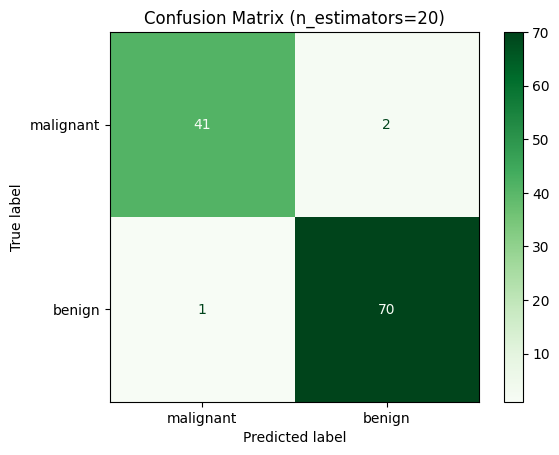

   n_estimators  Accuracy  Precision    Recall  F1-Score
0             1  0.894737   0.915493  0.915493  0.915493
1             5  0.929825   0.956522  0.929577  0.942857
2            10  0.964912   0.958904  0.985915  0.972222
3            15  0.973684   0.972222  0.985915  0.979021
4            20  0.973684   0.972222  0.985915  0.979021


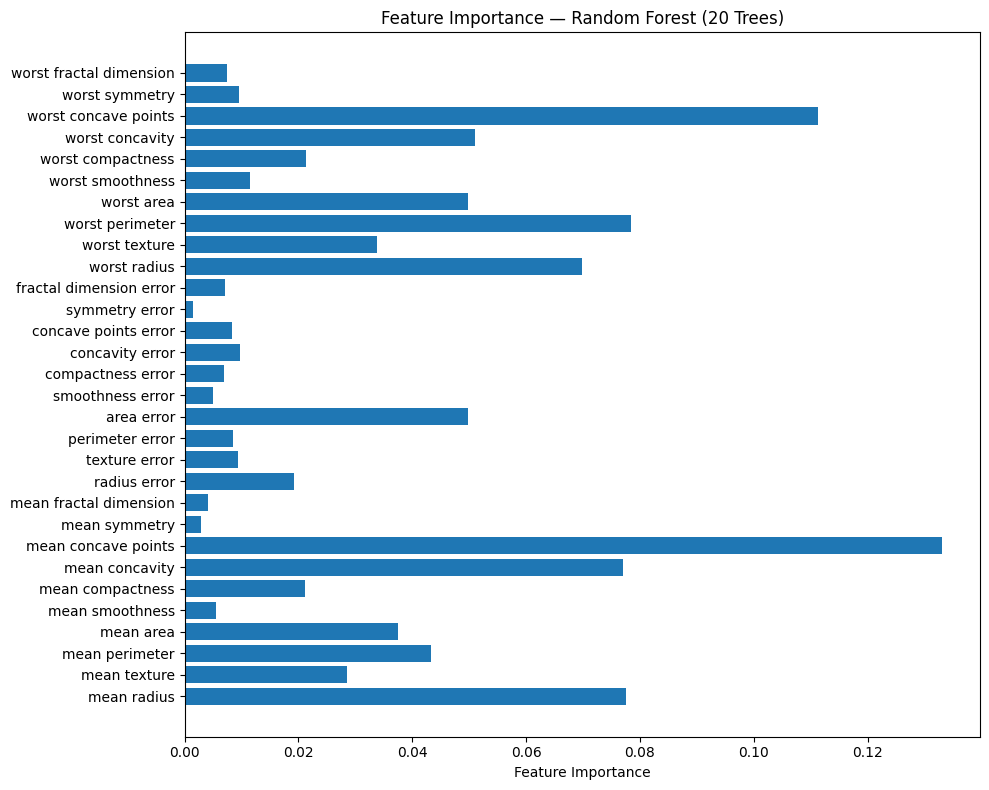

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define number of trees for evaluation
n_trees = [1, 5, 10, 15, 20]

# Initialize lists to store evaluation metrics
accuracies, precisions, recalls, f1_scores = [], [], [], []

# Evaluate Random Forest with different number of trees
for n in n_trees:
    rf = RandomForestClassifier(criterion="entropy", n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Record evaluation metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    # Plot confusion matrix for each setting
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap='Greens')
    plt.title(f'Confusion Matrix (n_estimators={n})')
    plt.show()

# Summarize performance metrics
metrics_df = pd.DataFrame({
    'n_estimators': n_trees,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})
print(metrics_df)

# Fit Random Forest with n_estimators=20 for feature importance plot
rf_final = RandomForestClassifier(criterion="entropy", n_estimators=20, random_state=42)
rf_final.fit(X_train, y_train)

# Plot feature importance
importances = rf_final.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(data.feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance — Random Forest (20 Trees)")
plt.tight_layout()
plt.show()


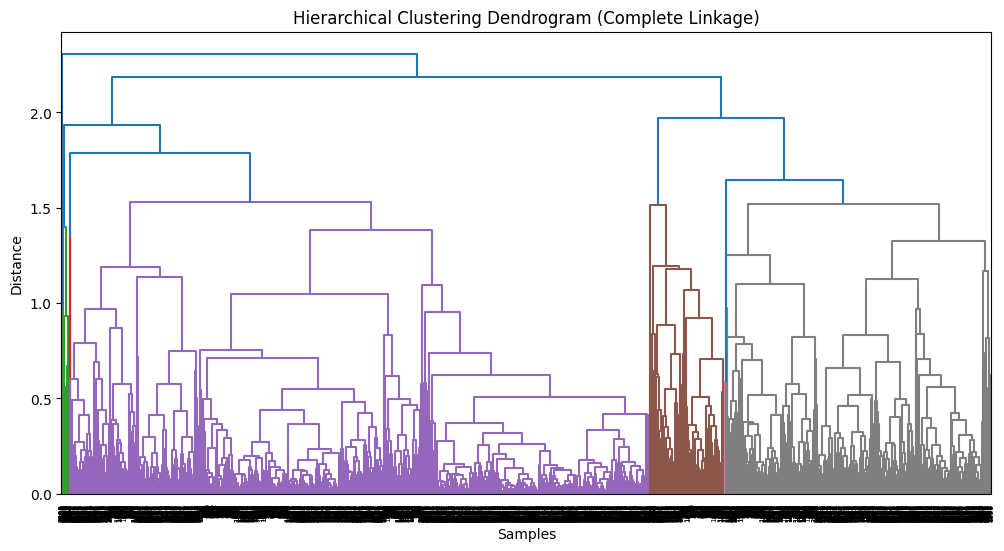

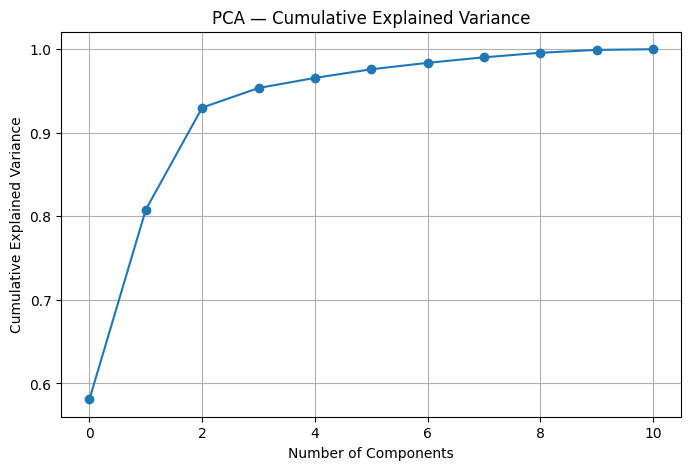

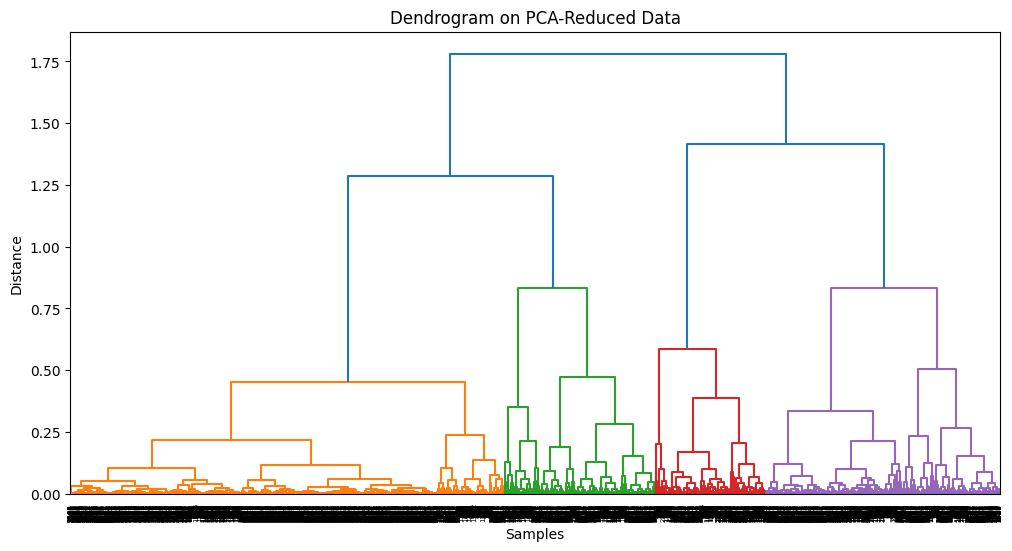

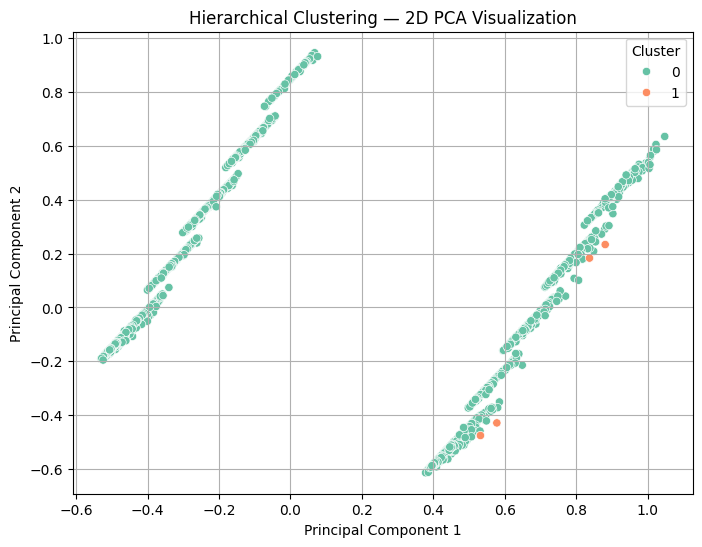

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset (ensure 'EastWestAirlines.xlsx' is in your working directory)
data = pd.read_excel('/EastWestAirlines.xlsx')

# Drop the ID# column as it does not contribute to clustering
data_clean = data.drop(columns=['ID#'])

# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data_clean)

# Plot dendrogram using 'complete' linkage
plt.figure(figsize=(12, 6))
dendrogram(linkage(data_norm, method='complete'))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering with 2 clusters
hc = AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters = hc.fit_predict(data_norm)

# Add cluster labels to the original dataset
data_clean['Cluster'] = clusters

# Apply PCA for variance explanation
pca = PCA()
pca.fit(data_norm)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA — Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Apply PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
data_pca = pca_2d.fit_transform(data_norm)

# Plot dendrogram on reduced 2D data
plt.figure(figsize=(12, 6))
dendrogram(linkage(data_pca, method='complete'))
plt.title('Dendrogram on PCA-Reduced Data')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Visualize clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Hierarchical Clustering — 2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


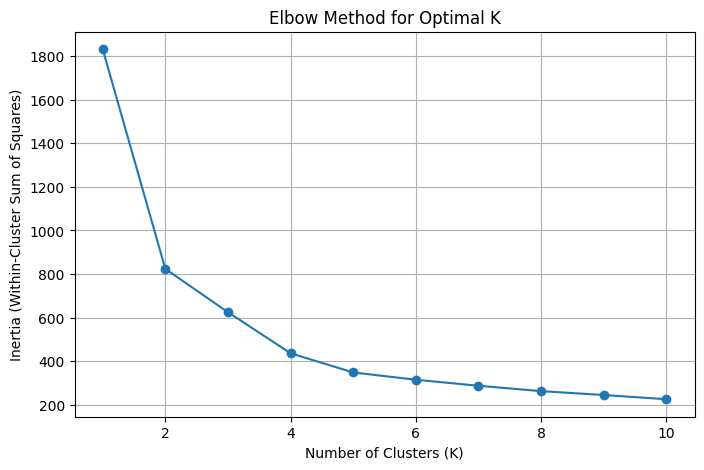

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.035081    0.007858   0.176330   0.006950   0.002184     0.038788   
1  0.056928    0.021546   0.415429   0.007765   0.004558     0.109621   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     0.106314           0.007343         0.012311           0.460411   
1     0.183518           0.027826         0.049049           0.557398   

         Award?  
0 -8.937295e-15  
1  1.000000e+00  


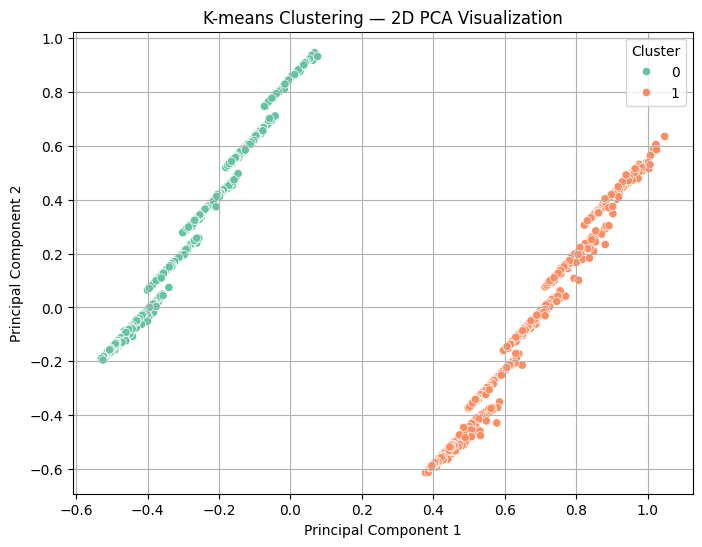

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset (ensure 'EastWestAirlines.xlsx' is in your working directory)
data = pd.read_excel('/EastWestAirlines.xlsx')

# Drop the ID# column
data_clean = data.drop(columns=['ID#'])

# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data_clean)

# Perform K-means clustering for different values of K to plot the Elbow Graph
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(data_norm)
    inertias.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Fit K-means model with K=2
kmeans_final = KMeans(n_clusters=2, random_state=2, n_init=10)
cluster_labels = kmeans_final.fit_predict(data_norm)

# Add cluster labels to dataset
data_clean['Cluster'] = cluster_labels

# Access centroids
centroids = kmeans_final.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=data_clean.columns[:-1])
print(centroid_df)

# Apply PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
data_pca = pca_2d.fit_transform(data_norm)

# Visualize K-means clusters in PCA-reduced 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels, palette='Set2')
plt.title('K-means Clustering — 2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
